### Comparing tweets and hate crime

In [53]:
!pip install plotly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.2/15.2 MB 1.3 MB/s eta 0:00:0000:0100:01
  Using cached tenacity-8.0.1-py3-none-any.whl (24 kB)


In [54]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

### Hate crime

In [2]:
crime = pd.read_csv('../Data collection/hate_crime.csv')

In [3]:
crime.drop(columns=['Unnamed: 4','Unnamed: 5','Unnamed: 7', 'Unnamed: 6'], inplace=True)

In [4]:
crime['date'] = pd.to_datetime(crime['Unnamed: 0'], format='%d/%m/%Y')

In [5]:
crime['Unnamed: 0'] = crime['Unnamed: 0'].astype('datetime64[ns]')

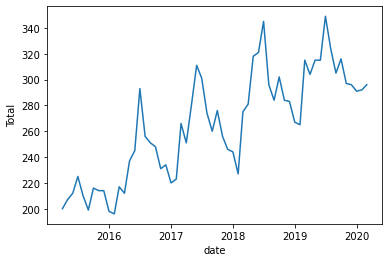

In [6]:
sns.lineplot(data=crime, x="date", y="Total");

### Tweets on immigration

In [12]:
tweets = pd.read_csv('20k_2008.csv')

In [13]:
tweets.head()

,Unnamed: 0,Datetime,Tweet Id,Text,Username,Like Count
0,0,2022-06-08 16:00:06+00:00,1534565944374267909,Rwanda policy is having 'NO impact' on migrant...,DailyMailUK,2.0
1,1,2022-06-08 12:56:00+00:00,1534519612200562689,Asylum seeker claims UK hotel stay is 'worse t...,Daily_Express,8.0
2,2,2022-06-08 01:30:08+00:00,1534347009406251008,More than half the 130 asylum-seekers facing f...,MailOnline,8.0
3,3,2022-06-07 11:37:57+00:00,1534137584338845696,'Rwanda plan is NOT working': 80 migrants land...,DailyMailUK,5.0
4,4,2022-06-05 03:29:56+00:00,1533289994584002561,Anger as hundreds of refugee children from Ukr...,MailOnline,16.0


In [14]:
tweets['Date'] = tweets['Datetime'].str[:11]

In [15]:
tweets

,Unnamed: 0,Datetime,Tweet Id,Text,Username,Like Count,Date
0,0,2022-06-08 16:00:06+00:00,1534565944374267909,Rwanda policy is having 'NO impact' on migrant...,DailyMailUK,2.0,2022-06-08
1,1,2022-06-08 12:56:00+00:00,1534519612200562689,Asylum seeker claims UK hotel stay is 'worse t...,Daily_Express,8.0,2022-06-08
2,2,2022-06-08 01:30:08+00:00,1534347009406251008,More than half the 130 asylum-seekers facing f...,MailOnline,8.0,2022-06-08
3,3,2022-06-07 11:37:57+00:00,1534137584338845696,'Rwanda plan is NOT working': 80 migrants land...,DailyMailUK,5.0,2022-06-07
4,4,2022-06-05 03:29:56+00:00,1533289994584002561,Anger as hundreds of refugee children from Ukr...,MailOnline,16.0,2022-06-05
...,...,...,...,...,...,...,...
21436,21434,2008-08-19 08:51:25+00:00,891944603,One man dead and three critical in horror bus ...,MailOnline,0.0,2008-08-19
21437,21435,2008-08-18 20:22:00+00:00,891418251,One killed and up to 40 injured after migrant ...,MailOnline,0.0,2008-08-18
21438,21436,2008-08-14 12:52:03+00:00,887337505,Gary Glitter to be deported back to Britain af...,MailOnline,0.0,2008-08-14
21439,21437,2008-08-10 22:20:40+00:00,883577335,Russia tanks &#039;turned back&#039; after try...,MailOnline,0.0,2008-08-10


In [17]:
tweets.drop([7846,21396],inplace=True)

In [18]:
tweets[tweets['Date'].str.contains('MailOnline')]

,Unnamed: 0,Datetime,Tweet Id,Text,Username,Like Count,Date


In [19]:
tweets['Date'] = pd.to_datetime(tweets['Date'], infer_datetime_format=True)

In [20]:
tweets.dtypes

Unnamed: 0            object
Datetime              object
Tweet Id               int64
Text                  object
Username              object
Like Count           float64
Date          datetime64[ns]
dtype: object

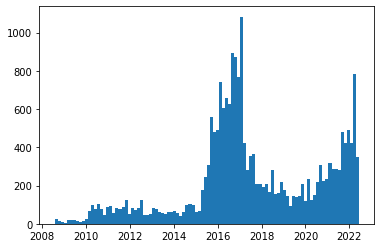

In [21]:
plt.hist(tweets['Date'],bins=100);

/var/folders/ck/xg3scjhn503b00cjf3vysm3h0000gn/T/ipykernel_9183/1761208110.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  short_like = short_like[mask2]


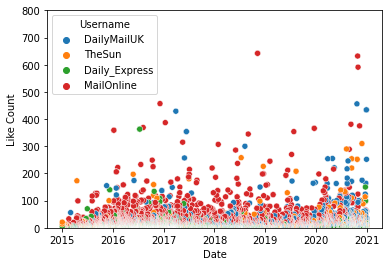

In [39]:


mask1 = tweets['Date'].dt.year> int(2014) 
mask2 =  tweets['Date'].dt.year< int(2021)
short_like = tweets[mask1]
short_like = short_like[mask2]

sns.scatterplot(x="Date", y = "Like Count", data = short_like, hue="Username")
plt.ylim(0, 800);

In [40]:
mask1 = tweets['Date'].dt.year> int(2014) 
mask2 =  tweets['Date'].dt.year< int(2021)
short_tweets = tweets[mask1]
short_tweets = short_tweets[mask2]

/var/folders/ck/xg3scjhn503b00cjf3vysm3h0000gn/T/ipykernel_9183/2187115690.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  short_tweets = short_tweets[mask2]


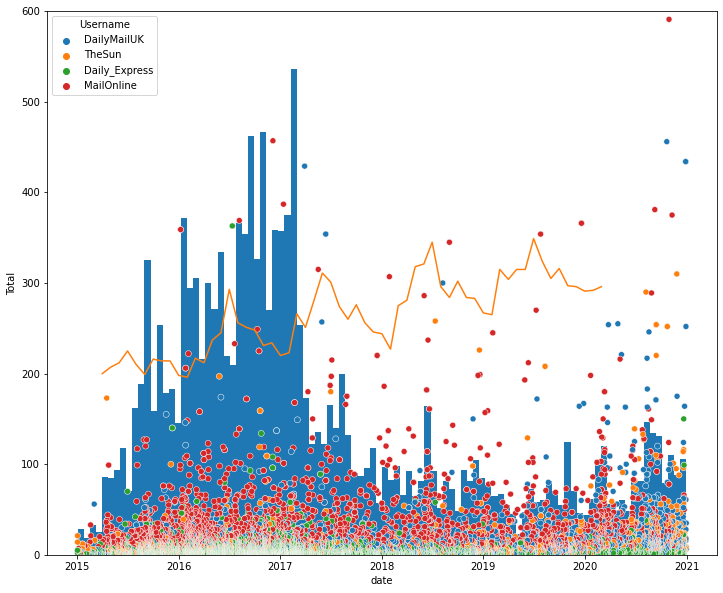

In [49]:
plt.figure(figsize=(12,10))
plt.hist(short_tweets['Date'],bins=100)
sns.lineplot(data=crime, x="date", y="Total")
sns.scatterplot(x="Date", y = "Like Count", data = short_like, hue="Username")
plt.ylim(0, 600);